<a href="https://colab.research.google.com/github/hirokimituya/book_create-profitable-AI-with-Python/blob/main/ch05_05_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.5 顧客層に応じた販売戦略(クラスタリング、次元圧縮)


## 共通事前処理

In [1]:
# クラスターIDの並びを書籍と合わせるために下記のpipコマンドを実行します
!pip install scikit-learn==0.22.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-learn==0.22.2 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2)
ERROR: No matching distribution found for scikit-learn==0.22.2


In [2]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [3]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

## 5.5.4 データ読み込みからデータ確認まで

In [4]:
# データ読み込み
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases\
/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

# 日本語に変更
columns = ['販売チャネル', '地域', '生鮮食品', '乳製品', '食料品', 
    '冷凍食品', '洗剤_紙製品', '総菜']

df.columns = columns

In [5]:
# データ確認
display(df.head())

# サイズ確認
print(df.shape)

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [6]:
# 欠損値確認
print(df.isnull().sum())

販売チャネル    0
地域        0
生鮮食品      0
乳製品       0
食料品       0
冷凍食品      0
洗剤_紙製品    0
総菜        0
dtype: int64


In [7]:
# 販売チャネルのラベル値確認
print(df['販売チャネル'].value_counts())
print()

# 地域のラベル確認
print(df['地域'].value_counts())

1    298
2    142
Name: 販売チャネル, dtype: int64

3    316
1     77
2     47
Name: 地域, dtype: int64


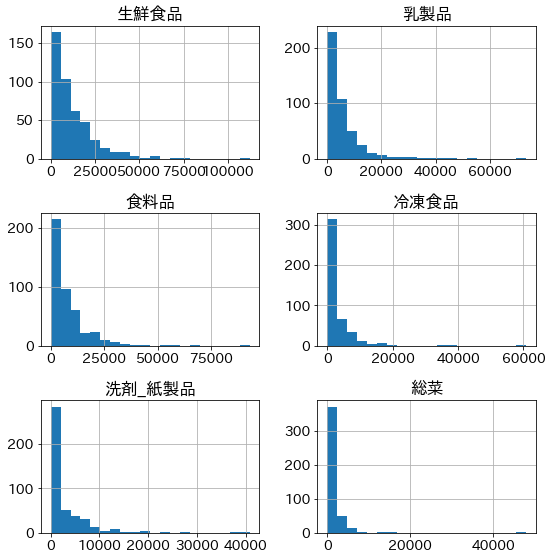

In [8]:
# 販売チャネルと地域を落としたデータを作る
df2 = df.drop(['販売チャネル', '地域'], axis=1)

# 分析対象項目のヒストグラム表示
from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)
df2.hist(bins=20)
plt.tight_layout()
plt.show()

## 5.5.5 クラスタリングの実施

In [9]:
# データ前処理とデータ分割は不要

# アルゴリズムの選択
from sklearn.cluster import KMeans

# グループ数の定義
clusters = 4

# アルゴリズムの定義
algorithm = KMeans(n_clusters=clusters, random_state=random_seed)

In [10]:
# 学習、予測の実施
y_pred = algorithm.fit_predict(df2)

# 結果の一分確認
print(y_pred[:20])

[1 2 1 1 0 1 1 1 1 2 2 1 0 2 0 1 2 1 1 1]


## 5.5.6 クラスタリング結果の分析

In [11]:
# グループごとの平均値計算
df_cluster = df2.groupby(y_pred).mean()
display(df_cluster)

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,36144.4828,5471.4655,6128.7931,6298.6552,1064.0000,2316.7241
1,9087.4638,3027.4275,3753.5145,2817.9855,1003.0036,1040.5254
2,4808.8421,10525.0105,16909.7895,1462.5895,7302.4000,1650.8842
3,19888.2727,36142.3636,45517.4545,6328.9091,21417.0909,8414.0000


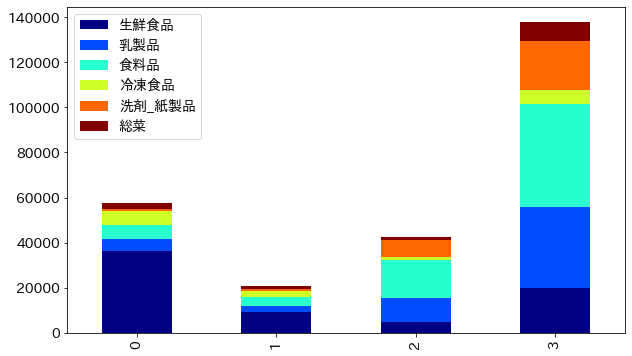

In [12]:
# ブループ別の棒グラフ表示
df_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='jet')
plt.show()

==== グループ 0 ====


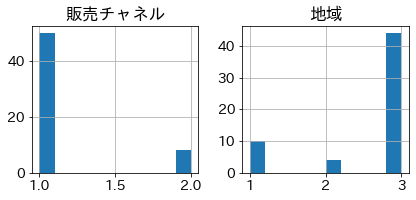

==== グループ 1 ====


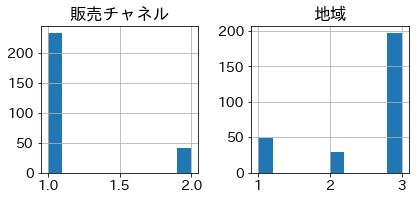

==== グループ 2 ====


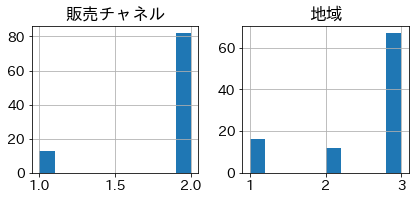

==== グループ 3 ====


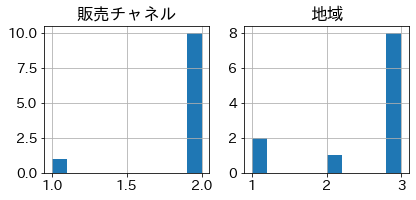

In [13]:
# グループと、チャネル・地域の関係を調べる

# 販売チャネルと地域のみをdf3に抽出
df3 = df[['販売チャネル', '地域']]

# グラフの大きさ設定
rcParams['figure.figsize'] = (6, 3)

# グループごとのグラフ表示
for i in range(clusters):
    fig, ax = plt.subplots()
    w = df3[y_pred == i]
    print(f'==== グループ {i} ====')
    w.hist(ax=ax)
    plt.tight_layout()
    plt.show()

## 5.5.7 次元圧縮の実施

In [14]:
# アルゴリズムの選択
from sklearn.decomposition import PCA

# モデル生成
# 散布図表示が目的のため2次元に圧縮
pca = PCA(n_components=2)

In [15]:
# 学習・変換の実施
d2 = pca.fit_transform(df2)

#　結果の一分表示
print(d2[:5, :])

[[  650.0221  1585.5191]
 [-4426.805   4042.4515]
 [-4841.9987  2578.7622]
 [  990.3464 -6279.806 ]
 [10657.9987 -2159.7258]]


## 5.5.8 次元圧縮の活用方法

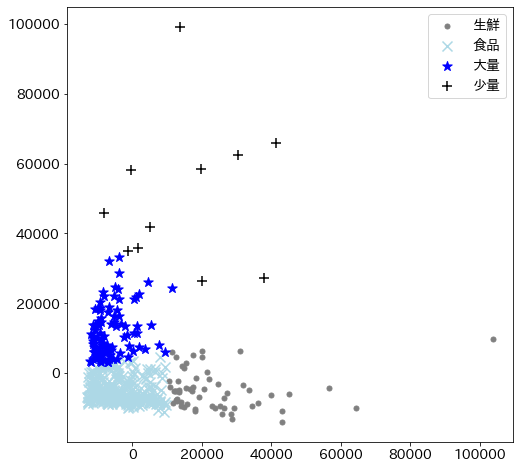

In [16]:
# グループごとに色分けし散布図表示

plt.figure(figsize=(8, 8))
marks = ['.', 'x', '*', '+']
labels = ['生鮮', '食品', '大量', '少量']
colors = ['grey', 'lightblue', 'blue', 'black']
for i in range(clusters):
    plt.scatter(d2[y_pred == i][:, 0], d2[y_pred == i][:, 1],
                marker=marks[i], label=labels[i], s=100, c=colors[i])
plt.legend(fontsize=14)
plt.show()

In [17]:
# 生鮮グループの例外値を調べる
display(df[d2[:, 0] > 100000])

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
181,1,3,112151,29627,18148,16745,4948,8550


In [18]:
# 大量グループの例外値を調べる
display(df[d2[:, 1] > 80000])

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
85,2,3,16117,46197,92780,1026,40827,2944


In [19]:
# 統計情報確認
display(df2.describe())

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
count,440.0000,440.0000,440.0000,440.0000,440.0000,440.0000
mean,12000.2977,5796.2659,7951.2773,3071.9318,2881.4932,1524.8705
std,12647.3289,7380.3772,9503.1628,4854.6733,4767.8544,2820.1059
min,3.0000,55.0000,3.0000,25.0000,3.0000,3.0000
25%,3127.7500,1533.0000,2153.0000,742.2500,256.7500,408.2500
50%,8504.0000,3627.0000,4755.5000,1526.0000,816.5000,965.5000
75%,16933.7500,7190.2500,10655.7500,3554.2500,3922.0000,1820.2500
max,112151.0000,73498.0000,92780.0000,60869.0000,40827.0000,47943.0000
